# Data Description

Exame Nacional do Ensino Medio (ENEM) stands for National High School Exam in english. It is a non-mandatory, standarized Brazilian national exam, which evaluates high school students in Brazil. The ENEM is the most important exam in this kind in Brazil, whith more than 8.6 million registered candidates in 2016. It is the second largest in the world after the National Higher Education Entrance Examination, the entrance examination of higher education in China (taken from Wikipedia).

Every year the governement releases what they call as `microdata` which can be describe as the most granular (and anonymized) data about each student who took the exam.

In [269]:
from collections import Counter
import dask.dataframe as dd
import gc
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from tqdm import tqdm


pd.set_option('display.max_columns',None)

In [2]:
microdata = "data/DADOS/MICRODADOS_ENEM_2017.csv"
data_dict  = "data/DICIONÁRIO/Dicionário_Microdados_Enem_2017.xlsx"

In [3]:
df = dd.read_csv(microdata, sep=';',encoding='latin-1', assume_missing=True)

In [4]:
df.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,1.700033e+11,2017.0,3503208.0,Araraquara,35.0,SP,29.0,F,0.0,1.0,...,A,C,B,B,C,B,B,B,A,A
1,1.700033e+11,2017.0,5002902.0,Cassilândia,50.0,MS,22.0,F,0.0,1.0,...,A,B,A,A,C,B,A,A,A,A
2,1.700017e+11,2017.0,3550308.0,São Paulo,35.0,SP,38.0,F,0.0,1.0,...,A,B,A,A,C,A,B,B,A,A
3,1.700017e+11,2017.0,4209300.0,Lages,42.0,SC,35.0,F,0.0,1.0,...,B,C,A,B,D,A,B,B,A,A
4,1.700017e+11,2017.0,2704302.0,Maceió,27.0,AL,40.0,M,0.0,3.0,...,A,B,B,A,C,A,C,B,A,A
5,1.700017e+11,2017.0,4303103.0,Cachoeirinha,43.0,RS,20.0,F,0.0,1.0,...,B,D,B,A,D,A,C,B,A,A
6,1.700033e+11,2017.0,4106902.0,Curitiba,41.0,PR,36.0,M,1.0,2.0,...,B,B,A,A,C,A,B,B,A,A
7,1.700033e+11,2017.0,4214805.0,Rio do Sul,42.0,SC,18.0,F,0.0,1.0,...,B,B,A,B,D,B,B,B,A,A
8,1.700033e+11,2017.0,4322509.0,Vacaria,43.0,RS,23.0,F,0.0,1.0,...,A,B,A,A,B,A,A,A,A,A
9,1.700017e+11,2017.0,2607901.0,Jaboatão dos Guararapes,26.0,PE,23.0,M,0.0,3.0,...,A,B,B,A,D,B,B,B,A,A


In [5]:
%%time
len(df)

CPU times: user 4min 2s, sys: 2min 12s, total: 6min 14s
Wall time: 2min 24s


6731341

Cada 10% = ~600 mil dados

The data can be divided into nine categories:
 - Student Data
 - Student's school Data
 - Special Treatment Data
 - Specific Treatment Data
 - Special and Specific Requests for the Test Data
 - Place where the Test were taken Data
 - Test Data
 - Essay Data
 - Social Economic Data
 
 Those informations are datailed by the following tables*:
 
 *
_I needed to use an image since `pandas` has some serious issues to treat Multi-Index Excel Files. You can check the original photo inside `img` folder._

## Student Information Data


![student](img/student_info.png)

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 21s, sys: 2min 19s, total: 6min 40s
Wall time: 2min 44s


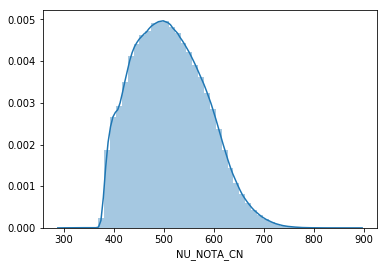

In [6]:
%%time
sns.distplot(df[('NU_NOTA_CN')].fillna(0)[df[('NU_NOTA_CN')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 21s, sys: 2min 29s, total: 6min 51s
Wall time: 2min 40s


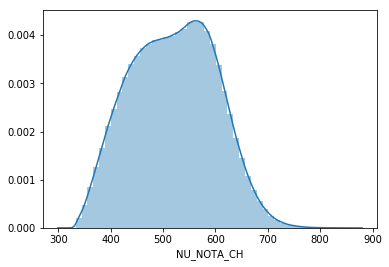

In [7]:
%%time
sns.distplot(df[('NU_NOTA_CH')].fillna(0)[df[('NU_NOTA_CH')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 24s, sys: 2min 28s, total: 6min 53s
Wall time: 2min 49s


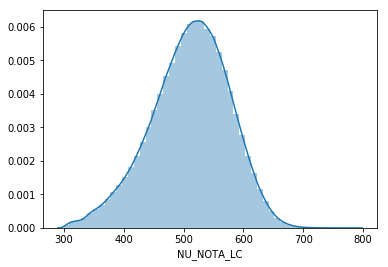

In [8]:
%%time
sns.distplot(df[('NU_NOTA_LC')].fillna(0)[df[('NU_NOTA_LC')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 20s, sys: 2min 32s, total: 6min 52s
Wall time: 2min 46s


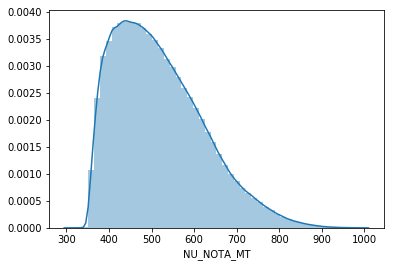

In [9]:
%%time
sns.distplot(df[('NU_NOTA_MT')].fillna(0)[df[('NU_NOTA_MT')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 23s, sys: 2min 48s, total: 7min 12s
Wall time: 3min 5s


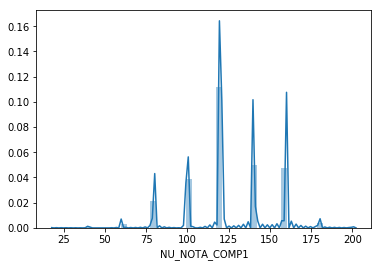

In [10]:
%%time
sns.distplot(df[('NU_NOTA_COMP1')].fillna(0)[df[('NU_NOTA_COMP1')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 14s, sys: 3min 1s, total: 7min 16s
Wall time: 2min 52s


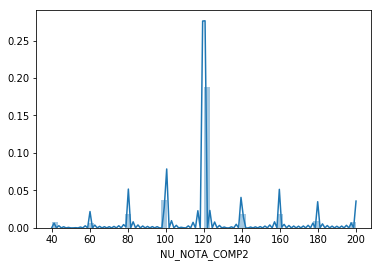

In [11]:
%%time
sns.distplot(df[('NU_NOTA_COMP2')].fillna(0)[df[('NU_NOTA_COMP2')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 24s, sys: 3min 13s, total: 7min 38s
Wall time: 3min 10s


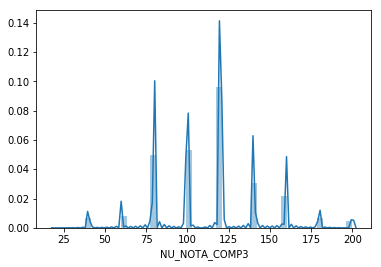

In [12]:
%%time
sns.distplot(df[('NU_NOTA_COMP3')].fillna(0)[df[('NU_NOTA_COMP3')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 5min 3s, sys: 3min 16s, total: 8min 19s
Wall time: 4min 6s


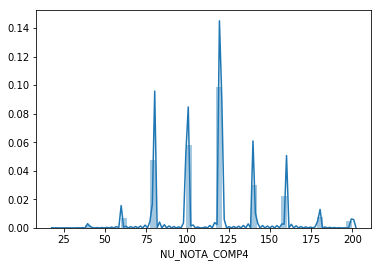

In [13]:
%%time
sns.distplot(df[('NU_NOTA_COMP4')].fillna(0)[df[('NU_NOTA_COMP4')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 5min 21s, sys: 2min 55s, total: 8min 17s
Wall time: 4min 16s


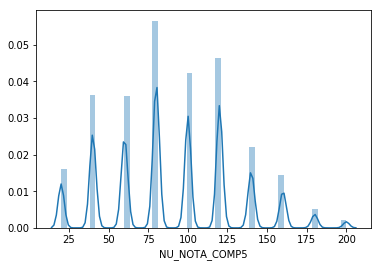

In [14]:
%%time
sns.distplot(df[('NU_NOTA_COMP5')].fillna(0)[df[('NU_NOTA_COMP5')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 5min 28s, sys: 3min 22s, total: 8min 51s
Wall time: 4min 51s


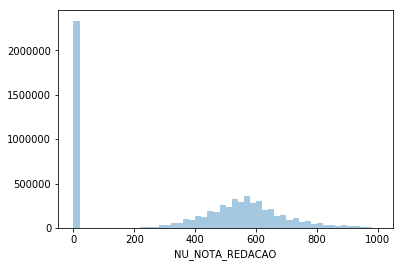

In [15]:
%%time
sns.distplot(df[('NU_NOTA_REDACAO')].fillna(0), kde=False);

People who got 0 on essay are being mixed up with people who did not come at all. So it would be useful if we remove people who did not came at all

In [16]:
type(df)

dask.dataframe.core.DataFrame

## Sampling Data

In [5]:
df = dd.DataFrame.dropna(df, subset=['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [6]:
sample = df.sample(frac=0.1, random_state=17)

In [7]:
%%time
pandas_df = sample.compute()

CPU times: user 5min 8s, sys: 3min 7s, total: 8min 15s
Wall time: 4min 15s


/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


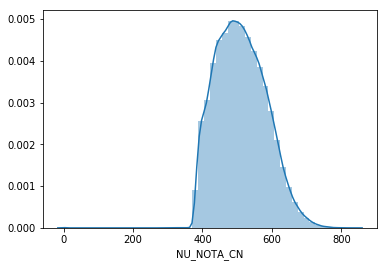

In [20]:
sns.distplot(pandas_df[('NU_NOTA_CN')]);

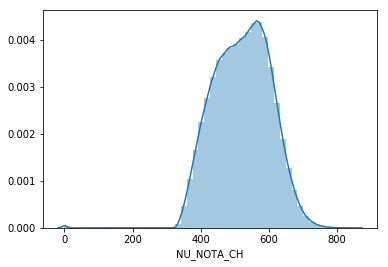

In [21]:
sns.distplot(pandas_df[('NU_NOTA_CH')]);

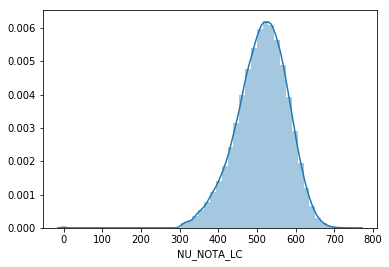

In [33]:
sns.distplot(pandas_df[('NU_NOTA_LC')]);

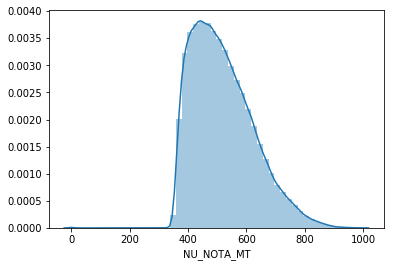

In [23]:
sns.distplot(pandas_df[('NU_NOTA_MT')]);

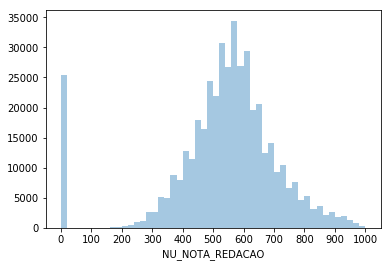

In [24]:
import matplotlib.ticker as ticker
x = np.random.randint(0,1000, size=(100))
ax = sns.distplot(pandas_df[('NU_NOTA_REDACAO')], kde=False);
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

"De acordo com os  dados divulgados nesta quinta-feira (18) pelo Ministério da Educação (MEC) e pelo Inep (instituto responsável pelo exame), a nota zero foi aplicada para mais de 309 mil dos 4,7 milhões de candidatos (6,5% do total) que fizeram a redação do  Enem , cujo tema em 2017 foram os "Desafios para a formação educacional de surdos no Brasil"."

Fonte: Último Segundo - iG @ https://ultimosegundo.ig.com.br/educacao/2018-01-18/enem-2017-resultados.html

As we got around 25000 for 10% sample, it seems we got reasonable results

In [26]:
pandas_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,1.700000e+11,2017.0,3550308.0,São Paulo,35.0,SP,21.0,F,1.0,3.0,1.0,3550308.0,São Paulo,35.0,SP,1.0,4.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3550308.0,São Paulo,35.0,SP,1.0,1.0,1.0,1.0,391.0,395.0,399.0,403.0,465.1,560.4,537.6,522.2,AEEEAEDCBEEAABEBDBDCADCAEAEBECBECBCBCDDBDEBEA,CDEEACEECEAEBEEAAEAEBDAEABAAACBEAEABABBACDEBB,DDBDA99999ACDADABECECECEEA*EDCEBBDDCADBDEABEED...,DBCAEADCAEDDDCBCDAAEBBDBCDDCBBECAAECCCEAEBDBE,0.0,DEEBDABCBBEDDCBABCADECEBAADAAECDCBCCDACDEEAAE,CDDECADBEABDBEDAECAEBDAEBAEDBDBBAECDAEBCCCCDE,DDCDEEDBEEBDAEDAABCECDAEBADEDEDBBBDEABBCCABAAE...,ADBCCECBBDBAEBBDDDABDCCDEDECBEACDAEAABBACEECD,1.0,140.0,120.0,80.0,120.0,120.0,580.0,B,D,B,B,3.0,F,A,B,B,A,A,B,A,B,A,B,A,B,C,B,A,C,B,C,B,A,A
4419,1.700017e+11,2017.0,3133808.0,Itaúna,31.0,MG,28.0,F,NaN,1.0,1.0,3133808.0,Itaúna,31.0,MG,1.0,10.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133808.0,Itaúna,31.0,MG,1.0,1.0,1.0,1.0,392.0,395.0,399.0,404.0,638.9,642.9,622.2,658.8,BABBECBDEBBDBAAEEDBACEDDDBAAAECEBACECAEDCCCAB,DDEEAADBEAABBBBAECCEDDBACAEDBAEBAECBAEBCCDCCB,DDCEE99999CDAECAECCECEAEBEDEDEDBAEDEADBCDABDAE...,AEACCEDDDECDDCDBBCACCBABDDBBCDDADBBABEEDDBECC,0.0,BCBBEBAAEDDCBDADEEBADECDCBCDAAEABCEEAAECDCCDA,CDDECADBEABDBEDAECAEBDAEBAEDBDBBAECDAEBCCCCDE,DDCDEEDBEEBDAEDAABCECDAEBADEDEDBBBDEABBCCABAAE...,CCECEECDADBBDBBDBAEBDDABECBDCCDEDBBACAEADAEAC,1.0,160.0,200.0,200.0,200.0,160.0,920.0,C,D,C,B,2.0,H,A,C,D,A,B,B,B,A,A,B,A,A,C,A,A,C,A,B,B,A,A
74421,1.700050e+11,2017.0,3304557.0,Rio de Janeiro,33.0,RJ,17.0,F,0.0,3.0,1.0,3304557.0,Rio de Janeiro,33.0,RJ,3.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [27]:
number_na = dict()
for i in tqdm(pandas_df.columns):
    num_nan_i = pandas_df.loc[ (pd.isna(pandas_df[i])), i ].shape[0]
    number_na[i]= num_nan_i

100%|██████████| 137/137 [00:01<00:00, 98.17it/s]


In [28]:
len(pandas_df)

442675

In [29]:
sorted(number_na.items(), key=operator.itemgetter(1), reverse=True)

[('TP_SIT_FUNC_ESC', 304665),
 ('TP_ENSINO', 304194),
 ('CO_ESCOLA', 304193),
 ('CO_MUNICIPIO_ESC', 304193),
 ('NO_MUNICIPIO_ESC', 304193),
 ('CO_UF_ESC', 304193),
 ('SG_UF_ESC', 304193),
 ('TP_DEPENDENCIA_ADM_ESC', 304193),
 ('TP_LOCALIZACAO_ESC', 304193),
 ('CO_MUNICIPIO_NASCIMENTO', 14874),
 ('NO_MUNICIPIO_NASCIMENTO', 14874),
 ('CO_UF_NASCIMENTO', 14874),
 ('SG_UF_NASCIMENTO', 14874),
 ('TP_ESTADO_CIVIL', 14406),
 ('NU_IDADE', 11),
 ('NU_INSCRICAO', 0),
 ('NU_ANO', 0),
 ('CO_MUNICIPIO_RESIDENCIA', 0),
 ('NO_MUNICIPIO_RESIDENCIA', 0),
 ('CO_UF_RESIDENCIA', 0),
 ('SG_UF_RESIDENCIA', 0),
 ('TP_SEXO', 0),
 ('TP_COR_RACA', 0),
 ('TP_NACIONALIDADE', 0),
 ('TP_ST_CONCLUSAO', 0),
 ('TP_ANO_CONCLUIU', 0),
 ('TP_ESCOLA', 0),
 ('IN_TREINEIRO', 0),
 ('IN_BAIXA_VISAO', 0),
 ('IN_CEGUEIRA', 0),
 ('IN_SURDEZ', 0),
 ('IN_DEFICIENCIA_AUDITIVA', 0),
 ('IN_SURDO_CEGUEIRA', 0),
 ('IN_DEFICIENCIA_FISICA', 0),
 ('IN_DEFICIENCIA_MENTAL', 0),
 ('IN_DEFICIT_ATENCAO', 0),
 ('IN_DISLEXIA', 0),
 ('IN_DISCALCU

## Remove Specific Columns

It would be useful to remove columns that have the same information between them. This would introduce some multicolinerity that we do not want. Moreover, it  will be necessary to remove columns that would not add any information for us. Based on that, the following columns are necessary to be deleted:

- NU_INSCRICAO (unique identifier)
- NU_ANO (2017 data)

Since there is a "global id" to specify locations, the following ones can be safely deleted

- NO_MUNICIPIO_RESIDENCIA
- CO_UF_RESIDENCIA
- SG_UF_RESIDENCIA
- NO_MUNICIPIO_NASCIMENTO
- CO_UF_NASCIMENTO
- SG_UF_NASCIMENTO
- NO_MUNICIPIO_ESC
- CO_UF_ESC
- SG_UF_ESC
- NO_MUNICIPIO_PROVA
- CO_UF_PROVA
- SG_UF_PROVA

As we removed the people who were absent in any day of the test, it is obvious that the other ones were present on every days

- TP_PRESENCA_CN
- TP_PRESENCA_CH
- TP_PRESENCA_LC
- TP_PRESENCA_MT

We are not interest in the specific versions of the test

- CO_PROVA_CN
- CO_PROVA_CH
- CO_PROVA_LC
- CO_PROVA_MT

As there would be a direct relationship between the student grade and the vector of responses (and the official set of answers) we can remove them.

- TX_RESPOSTAS_CN
- TX_RESPOSTAS_CH
- TX_RESPOSTAS_LC
- TX_RESPOSTAS_MT
- TX_GABARITO_CN
- TX_GABARITO_CH
- TX_GABARITO_LC
- TX_GABARITO_MT

Finaly, we can remove each components of the essay grade because the essay result is simply the sum of them. Thus,

- NU_NOTA_COMP1
- NU_NOTA_COMP2
- NU_NOTA_COMP3
- NU_NOTA_COMP4
- NU_NOTA_COMP5

In [8]:
columns_to_remove = ['NU_INSCRICAO',
                     'NU_ANO',
                     'NO_MUNICIPIO_RESIDENCIA',
                     'CO_UF_RESIDENCIA',
                     'SG_UF_RESIDENCIA',
                     'NO_MUNICIPIO_NASCIMENTO',
                     'CO_UF_NASCIMENTO',
                     'SG_UF_NASCIMENTO',
                     'NO_MUNICIPIO_ESC',
                     'CO_UF_ESC',
                     'SG_UF_ESC',
                     'NO_MUNICIPIO_PROVA',
                     'CO_UF_PROVA',
                     'SG_UF_PROVA',
                     'TP_PRESENCA_CN',
                     'TP_PRESENCA_CH',
                     'TP_PRESENCA_LC',
                     'TP_PRESENCA_MT',
                     'CO_PROVA_CN',
                     'CO_PROVA_CH',
                     'CO_PROVA_LC',
                     'CO_PROVA_MT',
                     'TX_RESPOSTAS_CN',
                     'TX_RESPOSTAS_CH',
                     'TX_RESPOSTAS_LC',
                     'TX_RESPOSTAS_MT',
                     'TX_GABARITO_CN',
                     'TX_GABARITO_CH',
                     'TX_GABARITO_LC',
                     'TX_GABARITO_MT',
                     'NU_NOTA_COMP1',
                     'NU_NOTA_COMP2',
                     'NU_NOTA_COMP3',
                     'NU_NOTA_COMP4',
                     'NU_NOTA_COMP5']

In [9]:
pandas_df.drop(columns_to_remove, axis=1, inplace=True)

In [10]:
len(pandas_df.columns)

102

In [11]:
pandas_df.head()

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,3550308.0,21.0,F,1.0,3.0,1.0,3550308.0,1.0,4.0,1.0,...,B,C,B,A,C,B,C,B,A,A
4419,3133808.0,28.0,F,NaN,1.0,1.0,3133808.0,1.0,10.0,1.0,...,A,C,A,A,C,A,B,B,A,A
74421,3304557.0,17.0,F,0.0,3.0,1.0,3304557.0,3.0,0.0,1.0,...,A,D,B,B,C,B,C,B,C,D
89869,2310902.0,24.0,M,0.0,2.0,1.0,2310902.0,1.0,6.0,1.0,...,A,C,B,A,D,A,B,B,A,A
84897,2503209.0,18.0,F,1.0,3.0,1.0,2507507.0,2.0,0.0,2.0,...,A,B,A,A,B,A,B,B,B,A


We saw that the following columns have significant NaN values:

-  ('TP_SIT_FUNC_ESC', 304665)
-  ('TP_ENSINO', 304194)
-  ('CO_ESCOLA', 304193)
-  ('CO_MUNICIPIO_ESC', 304193)
-  ('TP_DEPENDENCIA_ADM_ESC', 304193)
-  ('TP_LOCALIZACAO_ESC', 304193)

As 304193/442675= ~69% it would be ok to remove those guys. However I would like to still use some information about school and thus, I will simply set these situations to 0 (because all the original values are greater than 1).



In [12]:
columns_to_zero = ['TP_SIT_FUNC_ESC','TP_ENSINO','CO_ESCOLA','CO_MUNICIPIO_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC']
pandas_df[columns_to_zero] = pandas_df.loc[:, (columns_to_zero)].fillna(0, axis=1)

In [13]:
pandas_df.head()

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,3550308.0,21.0,F,1.0,3.0,1.0,3550308.0,1.0,4.0,1.0,...,B,C,B,A,C,B,C,B,A,A
4419,3133808.0,28.0,F,NaN,1.0,1.0,3133808.0,1.0,10.0,1.0,...,A,C,A,A,C,A,B,B,A,A
74421,3304557.0,17.0,F,0.0,3.0,1.0,3304557.0,3.0,0.0,1.0,...,A,D,B,B,C,B,C,B,C,D
89869,2310902.0,24.0,M,0.0,2.0,1.0,2310902.0,1.0,6.0,1.0,...,A,C,B,A,D,A,B,B,A,A
84897,2503209.0,18.0,F,1.0,3.0,1.0,2507507.0,2.0,0.0,2.0,...,A,B,A,A,B,A,B,B,B,A


Sanity Test

In [14]:
number_na = dict()
for i in tqdm(pandas_df.columns):
    num_nan_i = pandas_df.loc[ (pd.isna(pandas_df[i])), i ].shape[0]
    number_na[i]= num_nan_i

100%|██████████| 102/102 [00:00<00:00, 218.17it/s]


In [15]:
sorted(number_na.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('CO_MUNICIPIO_NASCIMENTO', 14874),
 ('TP_ESTADO_CIVIL', 14406),
 ('NU_IDADE', 11),
 ('CO_MUNICIPIO_RESIDENCIA', 0),
 ('TP_SEXO', 0),
 ('TP_COR_RACA', 0),
 ('TP_NACIONALIDADE', 0),
 ('TP_ST_CONCLUSAO', 0),
 ('TP_ANO_CONCLUIU', 0),
 ('TP_ESCOLA', 0)]

Much Better now :)

# Some EDA

In [270]:
pandas_df.head()

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,3550308.0,21.0,F,1.0,3.0,1.0,3550308.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3550308.0,465.1,560.4,537.6,522.2,0.0,1.0,580.0,B,D,B,B,3.0,F,A,B,B,A,A,B,A,B,A,B,A,B,C,B,A,C,B,C,B,A,A
4419,3133808.0,28.0,F,NaN,1.0,1.0,3133808.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133808.0,638.9,642.9,622.2,658.8,0.0,1.0,920.0,C,D,C,B,2.0,H,A,C,D,A,B,B,B,A,A,B,A,A,C,A,A,C,A,B,B,A,A
74421,3304557.0,17.0,F,0.0,3.0,1.0,3304557.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3304557.0,569.6,566.4,575.1,605.3,0.0,1.0,640.0,F,G,E,E,2.0,O,A,C,C,B,A,B,A,B,A,B,A,A,D,B,B,C,B,C,B,C,D
89869,2310902.0,24.0,M,0.0,2.0,1.0,2310902.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2308500.0,570.1,572.5,601.7,701.6,1.0,1.0,620.0,B,B,A,A,5.0,B,A,B,D,A,B,B,A,A,A,B,A,A,C,B,A,D,A,B,B,A,A
84897,2503209.0,18.0,F,1.0,3.0,1.0,2507507.0,2.0,0.0,2.0,1.0,0.0,25091611.0,2503209.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2503209.0,508.9,436.5,489.1,602.8,1.0,1.0,600.0,C,E,A,B,3.0,B,A,B,D,A,B,B,A,B,A,A,A,A,B,A,A,B,A,B,B,B,A


## Estado Civil

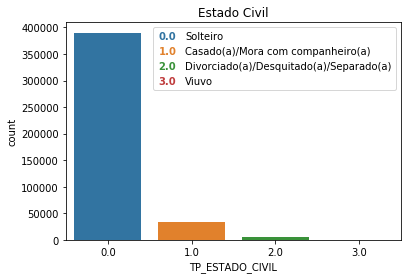

In [79]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

handltext = ["0.0", "1.0", "2.0", "3.0"]
labels = ["Solteiro", 
          "Casado(a)/Mora com companheiro(a)",
          "Divorciado(a)/Desquitado(a)/Separado(a)",
          "Viuvo"]

ax = sns.countplot(x = pandas_df['TP_ESTADO_CIVIL'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.set_title("Estado Civil")

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 


plt.show();

## Gênero

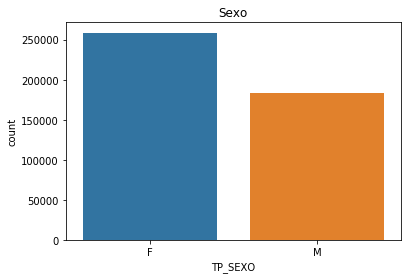

In [78]:
sns.countplot(pandas_df['TP_SEXO']).set_title("Sexo");

## Idade

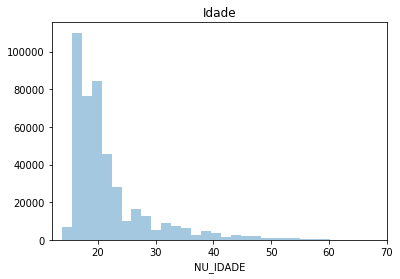

In [77]:
plt.xticks([i for i in range (0, 80,10)])
plt.xlim(12, 70)
sns.distplot(pandas_df['NU_IDADE'].fillna(0), kde=False).set_title("Idade");

## Etnia

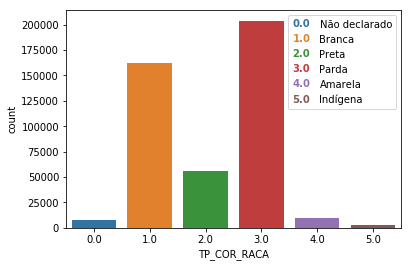

In [73]:
handltext = ["0.0", "1.0", "2.0", "3.0","4.0","5.0"]
labels = ["Não declarado", 
          "Branca",
          "Preta",
          "Parda",
          "Amarela",
          "Indígena"
         ]

ax = sns.countplot(x = pandas_df['TP_COR_RACA'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 


plt.show();

## Nacionalidade

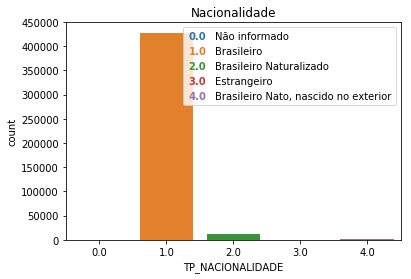

In [81]:
handltext = ["0.0", "1.0", "2.0", "3.0","4.0"]
labels = ["Não informado", 
          "Brasileiro",
          "Brasileiro Naturalizado",
          "Estrangeiro",
          "Brasileiro Nato, nascido no exterior"
         ]

ax = sns.countplot(x = pandas_df['TP_NACIONALIDADE'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
ax.set_title("Nacionalidade")

plt.show();

## Situação no EM

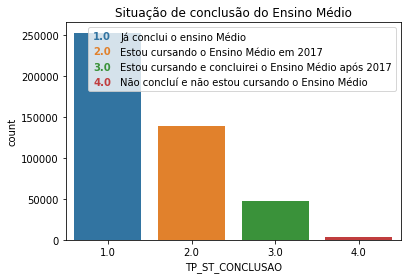

In [87]:
handltext = ["1.0", "2.0", "3.0","4.0"]
labels = ["Já conclui o ensino Médio", 
          "Estou cursando o Ensino Médio em 2017",
          "Estou cursando e concluirei o Ensino Médio após 2017",
          "Não concluí e não estou cursando o Ensino Médio"
         ]

ax = sns.countplot(x = pandas_df['TP_ST_CONCLUSAO'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
ax.set_title("Situação de conclusão do Ensino Médio")

plt.show();

## Quando conluiu EM

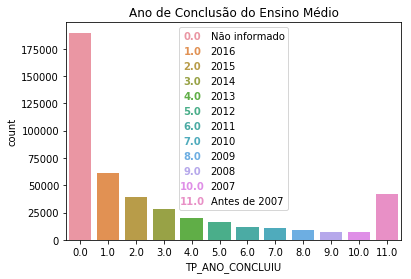

In [89]:
handltext = [str(float(i)) for i in range(12)]
labels = ["Não informado", 
          "2016",
          "2015",
          "2014",
          "2013",
          "2012",
          "2011",
          "2010",
          "2009",
          "2008",
          "2007",
          "Antes de 2007",
         ]

ax = sns.countplot(x = pandas_df['TP_ANO_CONCLUIU'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
ax.set_title("Ano de Conclusão do Ensino Médio")

plt.show();

Nessa amostra, temos cerca de 150000 pessoas que estão fazendo o Ensio Médio. Provavelmente grande parte dos `Não Informado` se deve à isso.

## Tipo Escola

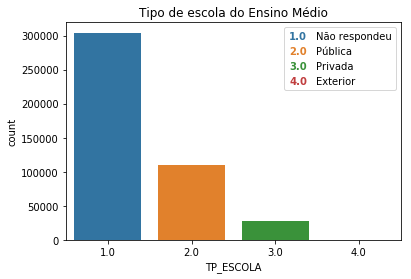

In [90]:
handltext = [str(float(i)) for i in range(1,5)]
labels = ["Não respondeu",
          "Pública",
          "Privada",
          "Exterior"
         ]

ax = sns.countplot(x = pandas_df['TP_ESCOLA'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
ax.set_title("Tipo de escola do Ensino Médio")

plt.show();

## Situação EM

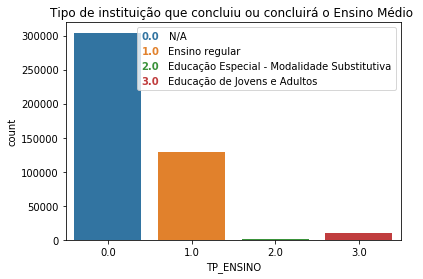

In [92]:
handltext = [str(float(i)) for i in range(4)]
labels = ["N/A",
          "Ensino regular",
          "Educação Especial - Modalidade Substitutiva",
          "Educação de Jovens e Adultos"
         ]

ax = sns.countplot(x = pandas_df['TP_ENSINO'])

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
ax.set_title("Tipo de instituição que concluiu ou concluirá o Ensino Médio ")

plt.show();

Considerando que grande parte não informou, esse tipo de `NaN` obtido coincide

## Treineiro

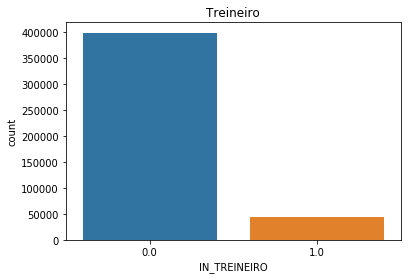

In [93]:
sns.countplot(pandas_df['IN_TREINEIRO']).set_title("Treineiro");

## Residência

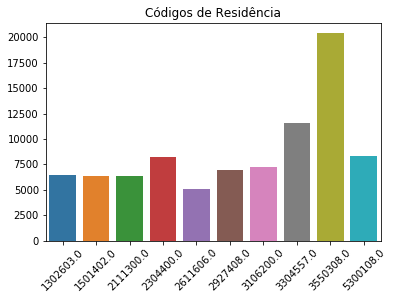

In [237]:
count_residencia = sorted(Counter(pandas_df['CO_MUNICIPIO_RESIDENCIA']).items(),
                          key=operator.itemgetter(1), reverse=True)[:10]
key_residence, value_residence = zip(*count_residencia)
residence = sns.barplot(list(key_residence),list(value_residence))
residence.set_title("Códigos de Residência")
for item in residence.get_xticklabels():
    item.set_rotation(45)

In [233]:
residences = pandas_df[['CO_MUNICIPIO_RESIDENCIA','TP_ENSINO']]\
                .groupby('CO_MUNICIPIO_RESIDENCIA')\
                .count()\
                .sort_values('TP_ENSINO', ascending=False)

df_residence = df[df['CO_MUNICIPIO_RESIDENCIA'].isin(residences.head(10).index)]
residences = df_residence[['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA',
                            'SG_UF_RESIDENCIA','TP_ENSINO']]\
                            .groupby(['CO_MUNICIPIO_RESIDENCIA',
                                      'NO_MUNICIPIO_RESIDENCIA',
                                       'SG_UF_RESIDENCIA']) \
                            .count()
residences.compute().sort_values('TP_ENSINO', ascending=False)

,,,TP_ENSINO
CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,
3550308.0,São Paulo,SP,78509
3304557.0,Rio de Janeiro,RJ,40050
5300108.0,Brasília,DF,26708
2304400.0,Fortaleza,CE,26048
1302603.0,Manaus,AM,19078
3106200.0,Belo Horizonte,MG,17939
2927408.0,Salvador,BA,16625
1501402.0,Belém,PA,14934
2611606.0,Recife,PE,13017


## Localização Escola

O Código da Escola em si (`CO_ESCOLA`) não interessa muito, mas sim, interessa onde a escola é localizada. Logo, a variável de interesse é `CO_MUNICIPIO_ESC`.

In [234]:
count_escola = sorted(Counter(pandas_df['CO_MUNICIPIO_ESC']).items(), key=operator.itemgetter(1), reverse=True)
count_escola[:5]

[(0.0, 304193),
 (3550308.0, 7839),
 (3304557.0, 3970),
 (5300108.0, 2764),
 (2304400.0, 2742)]

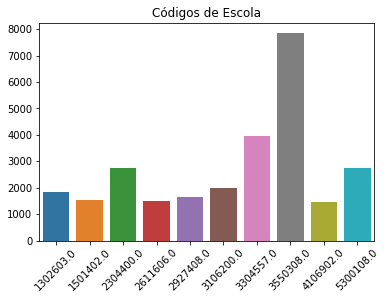

In [277]:
key, value = zip(*count_escola[1:11])
residence = sns.barplot(list(key),list(value))
residence.set_title("Códigos de Escola")
for item in residence.get_xticklabels():
    item.set_rotation(45)

In [236]:
schools = pandas_df[['CO_MUNICIPIO_ESC','TP_ENSINO']]\
                .groupby('CO_MUNICIPIO_ESC')\
                .count()\
                .sort_values('TP_ENSINO', ascending=False)

df_school = df[df['CO_MUNICIPIO_ESC'].isin(schools.head(11).index)]
schools = df_school[['CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC',
                            'SG_UF_ESC','TP_ENSINO']]\
                            .groupby(['CO_MUNICIPIO_ESC',
                                      'NO_MUNICIPIO_ESC',
                                       'SG_UF_ESC']) \
                            .count()
schools.compute().sort_values('TP_ENSINO', ascending=False)

,,,TP_ENSINO
CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,
3550308.0,São Paulo,SP,77839
3304557.0,Rio de Janeiro,RJ,39645
5300108.0,Brasília,DF,27470
2304400.0,Fortaleza,CE,27008
3106200.0,Belo Horizonte,MG,19487
1302603.0,Manaus,AM,19098
2927408.0,Salvador,BA,16686
1501402.0,Belém,PA,15491
4106902.0,Curitiba,PR,15330


In [256]:
residence_index = set(pandas_df[['CO_MUNICIPIO_RESIDENCIA','TP_ENSINO']]\
                    .groupby('CO_MUNICIPIO_RESIDENCIA')\
                    .count()\
                    .sort_values('TP_ENSINO', ascending=False).head(15).index)

In [267]:
school_index = set(pandas_df[['CO_MUNICIPIO_ESC','TP_ENSINO']]\
                .groupby('CO_MUNICIPIO_ESC')\
                .count()\
                .sort_values('TP_ENSINO', ascending=False).head(16).index)
school_index.remove(0.0)

In [268]:
school_index==residence_index

False

Due to slighty differences between both indexes I decided to no remove any of them. My initial hypothesis were that if a person studies somewhere he or she lived in the same region. Howevere, this hypothesis seems to be false.

## Nascimento

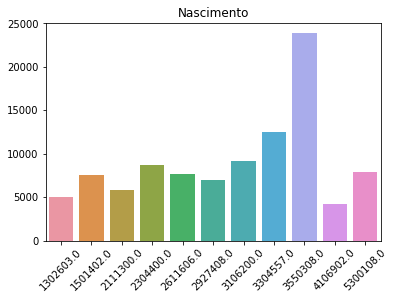

In [275]:
count_nasc = sorted(Counter(pandas_df['CO_MUNICIPIO_NASCIMENTO']).items(), key=operator.itemgetter(1), reverse=True)
key, value = zip(*count_nasc[0:11])
residence = sns.barplot(list(key),list(value))
residence.set_title("Nascimento")
for item in residence.get_xticklabels():
    item.set_rotation(45)

In [278]:
birth = pandas_df[['CO_MUNICIPIO_NASCIMENTO','TP_ENSINO']]\
                .groupby('CO_MUNICIPIO_NASCIMENTO')\
                .count()\
                .sort_values('TP_ENSINO', ascending=False)

df_birth = df[df['CO_MUNICIPIO_NASCIMENTO'].isin(birth.head(11).index)]
birth = df_birth[['CO_MUNICIPIO_NASCIMENTO','NO_MUNICIPIO_NASCIMENTO',
                            'SG_UF_NASCIMENTO','TP_ENSINO']]\
                            .groupby(['CO_MUNICIPIO_NASCIMENTO',
                                      'NO_MUNICIPIO_NASCIMENTO',
                                       'SG_UF_NASCIMENTO']) \
                            .count()
birth.compute().sort_values('TP_ENSINO', ascending=False)

,,,TP_ENSINO
CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,
3550308.0,São Paulo,SP,92455
3304557.0,Rio de Janeiro,RJ,42417
2304400.0,Fortaleza,CE,29229
5300108.0,Brasília,DF,28278
3106200.0,Belo Horizonte,MG,25149
2611606.0,Recife,PE,20176
1501402.0,Belém,PA,18218
2927408.0,Salvador,BA,17868
1302603.0,Manaus,AM,17093


The order of the values if basicaly the same for NASCIMENTO, ESC and RESIDENCIA. So if would me necessary to remove some columns, I would remove them

# Save to_feather type

In [284]:
pandas_df.head()

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,3550308.0,21.0,F,1.0,3.0,1.0,3550308.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3550308.0,465.1,560.4,537.6,522.2,0.0,1.0,580.0,B,D,B,B,3.0,F,A,B,B,A,A,B,A,B,A,B,A,B,C,B,A,C,B,C,B,A,A
4419,3133808.0,28.0,F,NaN,1.0,1.0,3133808.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133808.0,638.9,642.9,622.2,658.8,0.0,1.0,920.0,C,D,C,B,2.0,H,A,C,D,A,B,B,B,A,A,B,A,A,C,A,A,C,A,B,B,A,A
74421,3304557.0,17.0,F,0.0,3.0,1.0,3304557.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3304557.0,569.6,566.4,575.1,605.3,0.0,1.0,640.0,F,G,E,E,2.0,O,A,C,C,B,A,B,A,B,A,B,A,A,D,B,B,C,B,C,B,C,D
89869,2310902.0,24.0,M,0.0,2.0,1.0,2310902.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2308500.0,570.1,572.5,601.7,701.6,1.0,1.0,620.0,B,B,A,A,5.0,B,A,B,D,A,B,B,A,A,A,B,A,A,C,B,A,D,A,B,B,A,A
84897,2503209.0,18.0,F,1.0,3.0,1.0,2507507.0,2.0,0.0,2.0,1.0,0.0,25091611.0,2503209.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2503209.0,508.9,436.5,489.1,602.8,1.0,1.0,600.0,C,E,A,B,3.0,B,A,B,D,A,B,B,A,B,A,A,A,A,B,A,A,B,A,B,B,B,A


In [285]:
pandas_df.reset_index(drop=True).to_feather('data/sample_feather')